# Data Exploration
- [Load data](#load_data)
- [Split data](#split_data)
- [Overview of training data](#overview_training_data)
- [Clean data](#clean_data)
    - [Handle missing values](#handle_missing_values)
    - [Cast datatype(s) and clean 'name'](#cast_features)
- [Feature encoding](#encode_features)
- [Feature Exploration](#explore_features)
    - [Pair Plots](#pairplot)
    - [Descriptive statistics](#desc_stats)
    - [Correlations](#corr)
- [Summary and Preprocessing Pipeline](#summary)

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns
import project_path
from core import data_util, relp

### Loading Data <a id="load_data"></a>

Load data and assign column names.

In [2]:
DATA_PATH = 'data/auto-mpg.data'
COLUMNS =['mpg', 'cylinders', 'displacement', 
          'horsepower', 'weight', 'acceleration', 
          'year', 'origin', 'name']

df = data_util.load_data(DATA_PATH, column_header=COLUMNS)
df.shape

(398, 9)

### Splitting data <a id="split_data"></a>

In [3]:
# 'mpg' is the target variable
X = df.drop(['mpg'], axis=1)
y = df[['mpg']]
# 90-01 split
X_tn, X_ts, y_tn, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)
Xy_tn = pd.concat([X_tn, y_tn], axis=1, sort=False)

### Training Data Overview <a id="overview_training_data"></a>

In [4]:
Xy_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    318 non-null    object 
 3   weight        318 non-null    float64
 4   acceleration  318 non-null    float64
 5   year          318 non-null    int64  
 6   origin        318 non-null    int64  
 7   name          318 non-null    object 
 8   mpg           318 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 24.8+ KB


In [5]:
Xy_tn.describe()

cylinders  displacement       weight  acceleration        year  \
count  318.000000    318.000000   318.000000    318.000000  318.000000   
mean     5.430818    191.904088  2969.015723     15.639937   76.103774   
std      1.684947    102.983802   840.617729      2.763269    3.603177   
min      3.000000     68.000000  1613.000000      8.000000   70.000000   
25%      4.000000     98.500000  2220.000000     13.900000   73.000000   
50%      4.000000    148.500000  2822.500000     15.500000   76.000000   
75%      6.000000    259.500000  3597.250000     17.300000   79.000000   
max      8.000000    455.000000  5140.000000     24.800000   82.000000   

           origin         mpg  
count  318.000000  318.000000  
mean     1.591195   23.608176  
std      0.811696    7.930574  
min      1.000000    9.000000  
25%      1.000000   17.500000  
50%      1.000000   22.450000  
75%      2.000000   29.725000  
max      3.000000   46.600000

In [6]:
Xy_tn.sample(n=5, random_state=42)

cylinders  displacement horsepower  weight  acceleration  year  origin  \
150          4         108.0      93.00  2391.0          15.5    74       3   
319          4         120.0      75.00  2542.0          17.5    80       3   
7            8         440.0      215.0  4312.0           8.5    70       1   
1            8         350.0      165.0  3693.0          11.5    70       1   
90           8         429.0      198.0  4952.0          11.5    73       1   

                           name   mpg  
150                    "subaru"  26.0  
319                 "mazda 626"  31.3  
7           "plymouth fury iii"  14.0  
1           "buick skylark 320"  15.0  
90   "mercury marquis brougham"  12.0

### Data Cleaning <a id="clean_data"></a>

#### Handling Missing Values <a id="handle_missing_values"></a> 

Replace ? with numpy NaN and check missing values.

In [7]:
Xy_tn = Xy_tn.replace('?', np.nan)
Xy_tn.isna().values.sum()

5

In [8]:
Xy_tn_na = Xy_tn[Xy_tn.isna().any(axis=1)]
Xy_tn_na

cylinders  displacement horsepower  weight  acceleration  year  origin  \
336          4         140.0        NaN  2905.0          14.3    80       1   
374          4         151.0        NaN  3035.0          20.5    82       1   
32           4          98.0        NaN  2046.0          19.0    71       1   
354          4         100.0        NaN  2320.0          15.8    81       2   
330          4          85.0        NaN  1835.0          17.3    80       2   

                       name   mpg  
336    "ford mustang cobra"  23.6  
374        "amc concord dl"  23.0  
32             "ford pinto"  25.0  
354           "renault 18i"  34.5  
330  "renault lecar deluxe"  40.9

In [9]:
na_columns = Xy_tn.columns[Xy_tn.isna().any()].tolist()
na_columns

['horsepower']

<div class="alert alert-info">
    All 5 missing values are in <i>horsepower</i>. This constitute only around 1% of training data. There are many ways to handle this, rows with missing values will be dropped before exploring features. For modeling and testing, missing values will be imputed using kNN.
</div>

Drop rows with missing values.

In [10]:
Xy_tn = Xy_tn.dropna()
Xy_tn.describe()

cylinders  displacement       weight  acceleration        year  \
count  313.000000    313.000000   313.000000    313.000000  313.000000   
mean     5.453674    193.135783  2977.654952     15.612141   76.060703   
std      1.688553    103.286701   842.412049      2.762370    3.580506   
min      3.000000     68.000000  1613.000000      8.000000   70.000000   
25%      4.000000    101.000000  2220.000000     13.800000   73.000000   
50%      4.000000    151.000000  2830.000000     15.500000   76.000000   
75%      8.000000    262.000000  3609.000000     17.300000   79.000000   
max      8.000000    455.000000  5140.000000     24.800000   82.000000   

           origin         mpg  
count  313.000000  313.000000  
mean     1.594249   23.515655  
std      0.815455    7.908688  
min      1.000000    9.000000  
25%      1.000000   17.000000  
50%      1.000000   22.000000  
75%      2.000000   29.500000  
max      3.000000   46.600000

<div class="alert alert-info">
Observations: 
    <ul>
        <li><i>horsepower</i>'s type is object: it should be float.</li>
        <li><i>name</i> can potentially be a feature by keeping the first word (car brand).</li>
    </ul>
</div>

#### Datatype Casting and Modifying _name_ <a id="cast_features"></a>

Cast _horsepower_ to float.

In [11]:
Xy_tn = Xy_tn.copy()        # Suppress SettingWithCopyWarning
Xy_tn['horsepower'] = Xy_tn['horsepower'].astype(float)
Xy_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 3 to 102
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     313 non-null    int64  
 1   displacement  313 non-null    float64
 2   horsepower    313 non-null    float64
 3   weight        313 non-null    float64
 4   acceleration  313 non-null    float64
 5   year          313 non-null    int64  
 6   origin        313 non-null    int64  
 7   name          313 non-null    object 
 8   mpg           313 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 24.5+ KB


_name_ could be a feature candidate after cleaning by keeping only the first word (car brand).

In [12]:
# Keep only the first string (make) and remove quotes
Xy_tn['name'] = Xy_tn['name'].str.split(' ', expand=True)[0].str.strip('"')

In [13]:
Xy_tn['name'].unique()

array(['amc', 'datsun', 'mazda', 'honda', 'audi', 'pontiac', 'ford',
       'toyota', 'mercury', 'chrysler', 'opel', 'renault', 'plymouth',
       'dodge', 'chevrolet', 'volkswagen', 'buick', 'fiat', 'peugeot',
       'maxda', 'subaru', 'mercedes-benz', 'oldsmobile', 'bmw', 'saab',
       'triumph', 'vw', 'volvo', 'chevy', 'capri', 'hi', 'mercedes',
       'vokswagen', 'cadillac', 'chevroelt'], dtype=object)

In [14]:
# Correct typos and inconsistent brands (this step won't be applied to test data)
makes = {
    'chevroelt': 'chevrolet',
    'chevy': 'chevrolet',
    'maxda': 'mazda',
    'mercedes-benz': 'mercedes',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

Xy_tn['name'] = Xy_tn['name'].replace(makes)
Xy_tn.sample(n=5, random_state=42)

cylinders  displacement  horsepower  weight  acceleration  year  origin  \
349          4          91.0        68.0  1985.0          16.0    81       3   
90           8         429.0       198.0  4952.0          11.5    73       1   
215          8         318.0       150.0  3755.0          14.0    76       1   
136          8         302.0       140.0  4141.0          14.0    74       1   
36           6         250.0        88.0  3302.0          15.5    71       1   

        name   mpg  
349    mazda  34.1  
90   mercury  12.0  
215    dodge  13.0  
136     ford  16.0  
36      ford  19.0

In [15]:
Xy_tn['name'].value_counts()

ford          39
chevrolet     36
dodge         26
plymouth      23
datsun        22
amc           21
toyota        21
buick         16
volkswagen    16
pontiac       11
mercury       10
mazda         10
honda          9
peugeot        7
audi           6
fiat           6
oldsmobile     5
opel           4
subaru         4
volvo          4
chrysler       3
mercedes       3
renault        3
saab           2
bmw            2
hi             1
cadillac       1
triumph        1
capri          1
Name: name, dtype: int64

<div class="alert alert-info">
    More than half of the levels in <i>name</i> variable have small sample sizes (highly imbalanced). This feature will be removed.
</div>

### Feature Encoding <a id="encode_features"></a>

<table>
  <tr>
    <th>Types</th>
    <th>Features</th>
  </tr>
  <tr>
    <td>Ordinal</td>
      <td><i>year</i></td>
  </tr>
  <tr>
    <td>Nominal</td>
  <td><i>origin</i>
  </tr>
  <tr>
    <td>Interval</td>
  <td><i>cylinders</i>, <i>displacement</i>, <i>horsepower</i>, <i>weight</i>, <i>acceleration</i>, <i>mpg</i></td>
  </tr>
</table> 

<div class="alert alert-info">
    <i>year</i> is already ranked numerical values. <br>
    <i>origin</i> (1 = America, 2 = Europe, 3 = Asia) will be encoded with onehot encoding <br>
</div>

In [16]:
origin_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
origin_onehot = origin_encoder.fit_transform(Xy_tn[['origin']])
feature_names = origin_encoder.get_feature_names(['origin'])

if feature_names[0] not in list(Xy_tn.columns): # For Idempontency purpose
    Xy_tn = Xy_tn.join(pd.DataFrame(origin_onehot, columns=list(feature_names)))
Xy_tn.head()

cylinders  displacement  horsepower  weight  acceleration  year  origin  \
3            8         304.0       150.0  3433.0          12.0    70       1   
18           4          97.0        88.0  2130.0          14.5    70       3   
376          4          91.0        68.0  2025.0          18.2    82       3   
248          4          91.0        60.0  1800.0          16.4    78       3   
177          4         115.0        95.0  2694.0          15.0    75       2   

       name   mpg  origin_1  origin_2  origin_3  
3       amc  16.0       0.0       0.0       1.0  
18   datsun  27.0       1.0       0.0       0.0  
376   mazda  37.0       NaN       NaN       NaN  
248   honda  36.1       0.0       1.0       0.0  
177    audi  23.0       1.0       0.0       0.0

<div class="alert alert-info">
    Column <i>origin</i> will be removed.
</div>

### Feature Exploration <a id="explore_features"></a>

In [17]:
# List of numerical variables
num_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'mpg']

#### Pair Plots <a id="pairplot"></a>

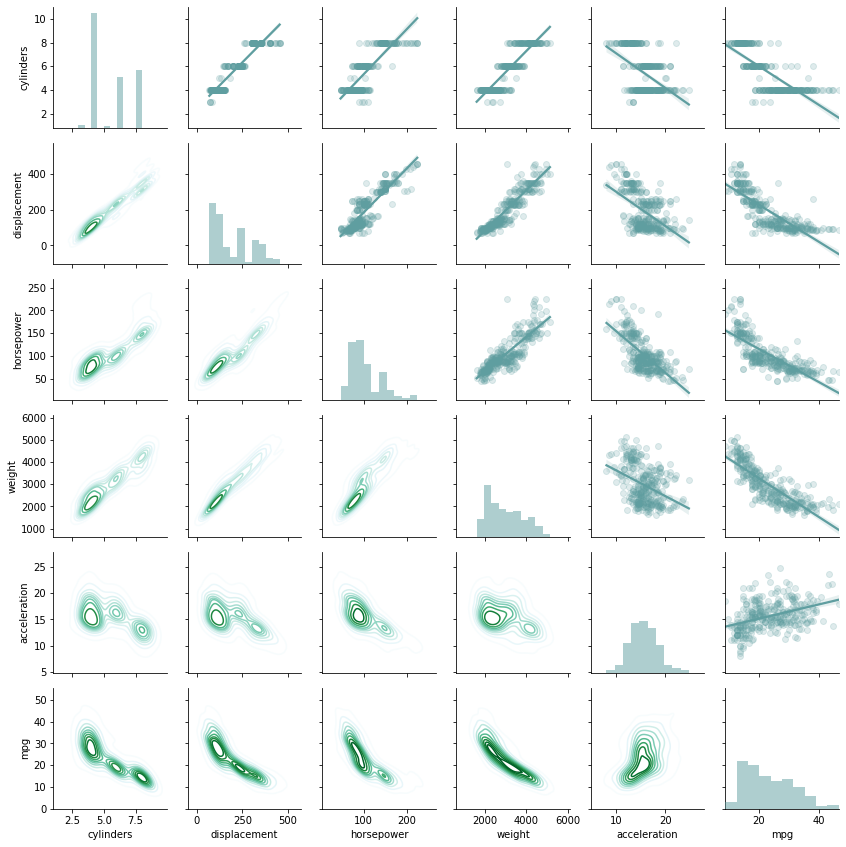

In [18]:
COLOR = 'cadetblue'
grid = sns.PairGrid(data=Xy_tn[num_features], height=2)
grid = grid.map_upper(sns.regplot, color=COLOR, scatter_kws={'alpha':0.2})
grid = grid.map_diag(plt.hist, color=COLOR, alpha=0.5)
grid = grid.map_lower(sns.kdeplot, cmap='BuGn')

#### Descriptive Statistics <a id="desc_stats"></a>

In [19]:
Xy_tn[num_features].describe()

cylinders  displacement  horsepower       weight  acceleration  \
count  313.000000    313.000000  313.000000   313.000000    313.000000   
mean     5.453674    193.135783  103.284345  2977.654952     15.612141   
std      1.688553    103.286701   37.361097   842.412049      2.762370   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    101.000000   75.000000  2220.000000     13.800000   
50%      4.000000    151.000000   92.000000  2830.000000     15.500000   
75%      8.000000    262.000000  122.000000  3609.000000     17.300000   
max      8.000000    455.000000  225.000000  5140.000000     24.800000   

              mpg  
count  313.000000  
mean    23.515655  
std      7.908688  
min      9.000000  
25%     17.000000  
50%     22.000000  
75%     29.500000  
max     46.600000

#### Feature Correlations <a id="corr"></a>

Linear Correlation

[('cylinders', 'displacement'), ('displacement', 'weight')]

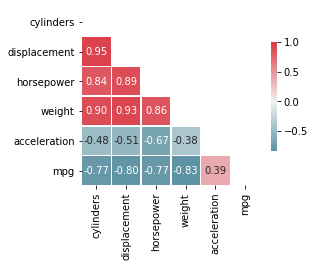

In [20]:
# Correlation plot: Linear relationship
lin_corr = Xy_tn[num_features].corr()
relp.plot_heatmap(lin_corr, figsize=(4, 4))
# Obtain correlated features above the threshold
relp.get_correlated_features(lin_corr, threshold=0.9)

Non-linear Correlation

[('cylinders', 'displacement'), ('displacement', 'weight')]

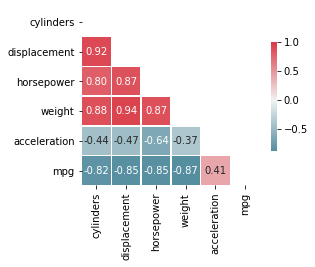

In [21]:
# Correlation plot: Monotonic relationship
mono_corr = Xy_tn[num_features].corr(method='spearman')
relp.plot_heatmap(mono_corr, figsize=(4, 4))
# Obtain correlated features above the threshold
relp.get_correlated_features(mono_corr, threshold=0.9)

<div class="alert alert-info"> <a id="summary"></a>
    <strong>Feature exploration summary:</strong> 
    <ul>
        <li>There is no zero variance feature in training data.</li>
        <li><i>acceleration</i> is normally distributed, the rest is not.</li>
        <li><i>displacement</i> and <i>cylinders</i> are very strongly correlated (0.95 and 0.92) .</li>
        <li><i>displacement</i> and <i>weight</i> are very strongly correlated (0.93 and 0.94).</li>
        <li>There is a weak correlation between <i>mpg</i> and <i>acceleration</i>. <i>mpg</i> has very strong correlations with the rest of interval variables (<i>cylinders</i>, <i>displacement</i>, <i>horsepower</i>, and <i>weight</i>).</li>
        <li>Features that should not be included in model learning are <i>name</i>,  <i>displacement</i> , and (non-encoded) <i>origin</i>.</li>
        <li>Numerical features will not be scaled because we plan to use decision tree based algorithm to train regression model.</li>
    </ul>
    <u>Preprocessing pipeline includes:</u>
    <ol>
        <li>Encode <i>origin</i> with OneHotEncoder.</li>
        <li>Impute missing values using kNN.</li>
        <li>Drop (non-encoded) <i>origin</i>, <i>name</i>, and <i>displacement</i>.</li>
        <li>Cast datatypes (int: <i>cylinder</i> and <i>year</i>, float: <i>displacement</i>, <i>horsepower</i>, <i>weight</i>, <i>acceleration</i>).</li>
    </ol>
</div>